In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('startup data.csv')
df.head(1)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.35888,-71.05682,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0,0,acquired


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
df['status']=df['status'].map({'acquired': 1, 'closed': 0}).astype(int)

In [ ]:
df_categorical = df.select_dtypes(include=['object'])
df_numerical = df.drop(df_categorical.columns, axis=1)

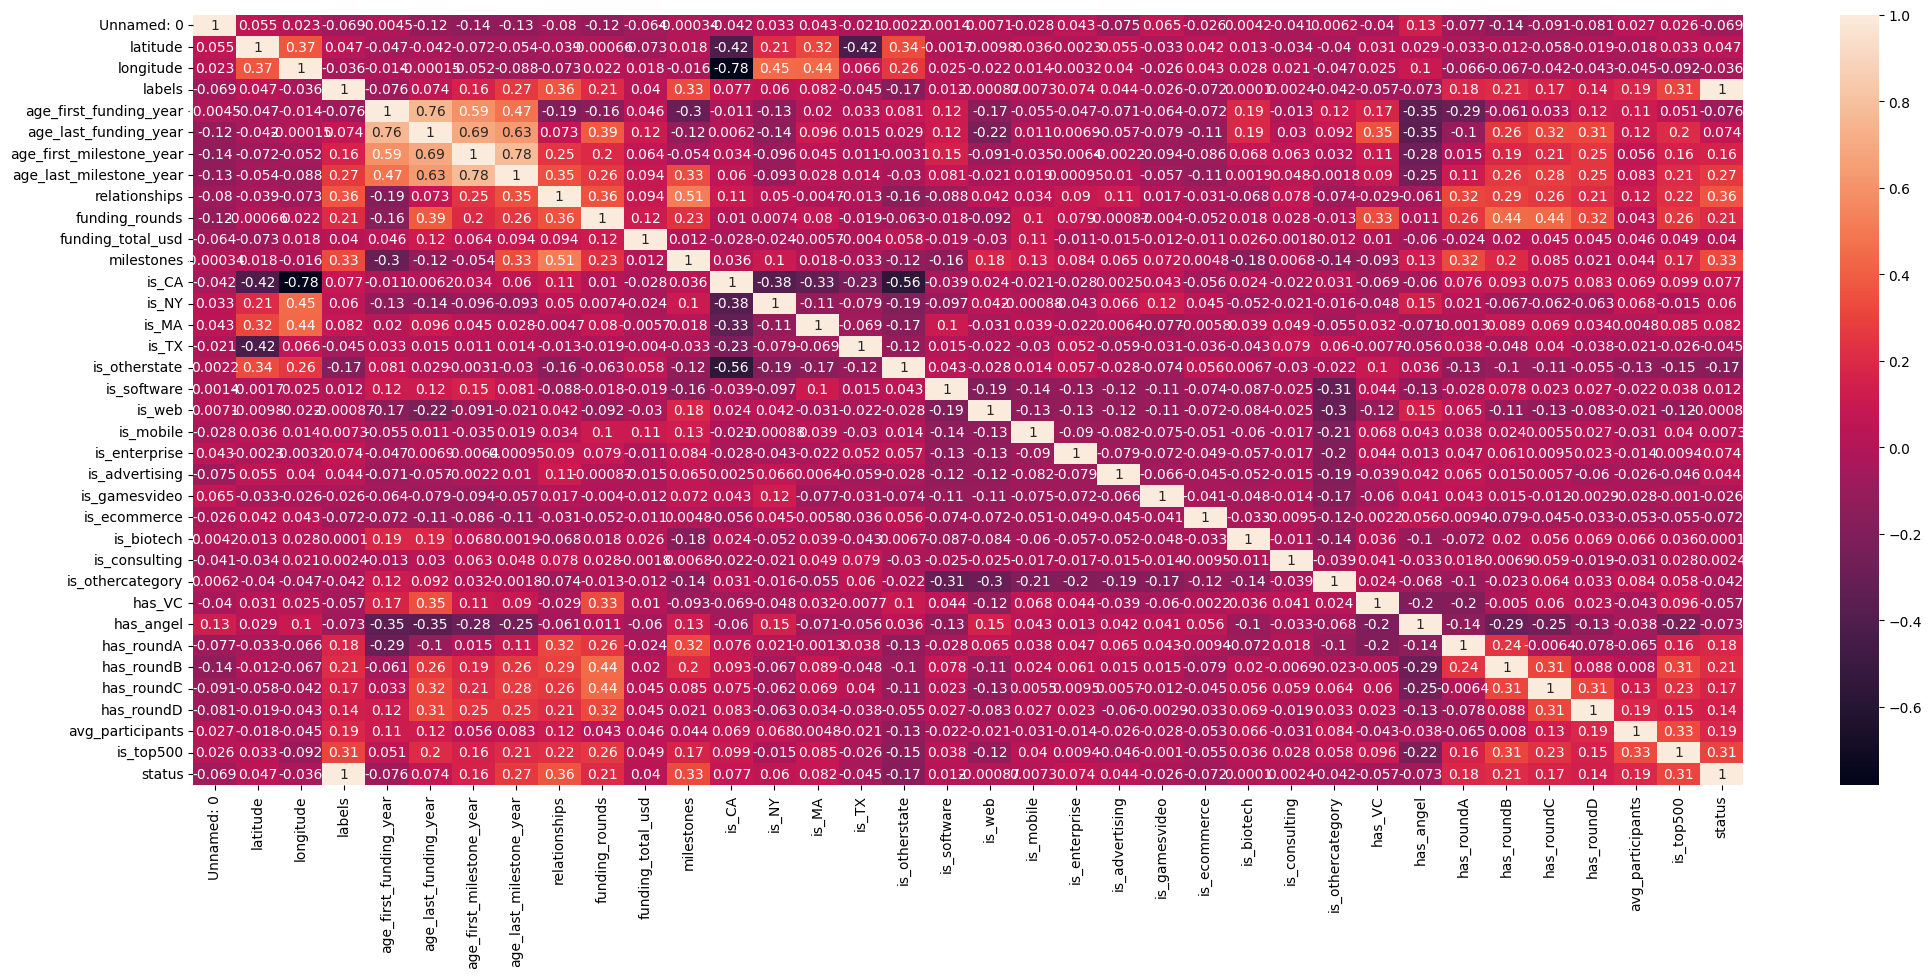

In [ ]:
corr = df_numerical.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot=True, cmap='rocket')
plt.show()

In [ ]:
df[df['labels'] != df['status']].shape

(0, 49)

In [ ]:
df.drop(['labels'], axis=1, inplace=True)

In [ ]:
missing=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
missing["% Missing Values"]=(df.isna().sum()/len(df)*100)
missing = missing[missing["% Missing Values"] > 0]
missing

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [ ]:
df.drop('state_code.1',axis=1,inplace=True)

In [ ]:
df['Unnamed: 6'].fillna((df['city'] + ' ' + df['state_code'] + ' ' + df['zip_code']), inplace=True)
df['Unnamed: 6'].head(10)

,Unnamed: 6
0,San Diego CA 92101
1,Los Gatos CA 95032
2,San Diego CA 92121
3,Cupertino CA 95014
4,San Francisco CA 94105
5,Mountain View CA 94043
6,Mountain View CA 94041
7,San Rafael CA 94901
8,Williamstown MA 1267
9,Palo Alto CA 94306


In [ ]:
df['age_first_milestone_year'].fillna(0, inplace=True)
df['age_last_milestone_year'].fillna(0, inplace=True)

In [ ]:
df['first_funding_at']=pd.to_datetime(df['first_funding_at'])
df['last_funding_at']=pd.to_datetime(df['last_funding_at'])

df['closed_at']=pd.to_datetime(df['closed_at'])
df['founded_at']=pd.to_datetime(df['founded_at'])
df['closed_at'].max()

Timestamp('2013-10-30 00:00:00')

In [ ]:
df[(df['closed_at'].isnull()) & (df['status'] == 0)].shape

(0, 47)

In [ ]:
df['closed_at'].fillna('2014-01-01', inplace=True)

In [ ]:
describeNum = df.drop(['latitude','longitude'],axis=1)
# Dividindo investimentos totais por 1 milhão para facilitar análise
describeNum['funding_total_usd'] = describeNum['funding_total_usd']/1_000_000
describeNum = describeNum.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='rocket',low=0.2,high=2.9)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,923.000000,2.552196,2.947421,-14.169900,0.000000,2.000000,4.002700,24.684900
age_last_milestone_year,923.000000,3.971462,3.424843,-7.005500,1.000000,3.783600,6.039750,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,923.000000,25.419749,189.634364,0.011000,2.725000,10.000000,24.725000,5700.000000
milestones,923.000000,1.841820,1.322632,0.000000,1.000000,2.000000,3.000000,8.000000
is_CA,923.000000,0.527627,0.499507,0.000000,0.000000,1.000000,1.000000,1.000000


<Axes: >

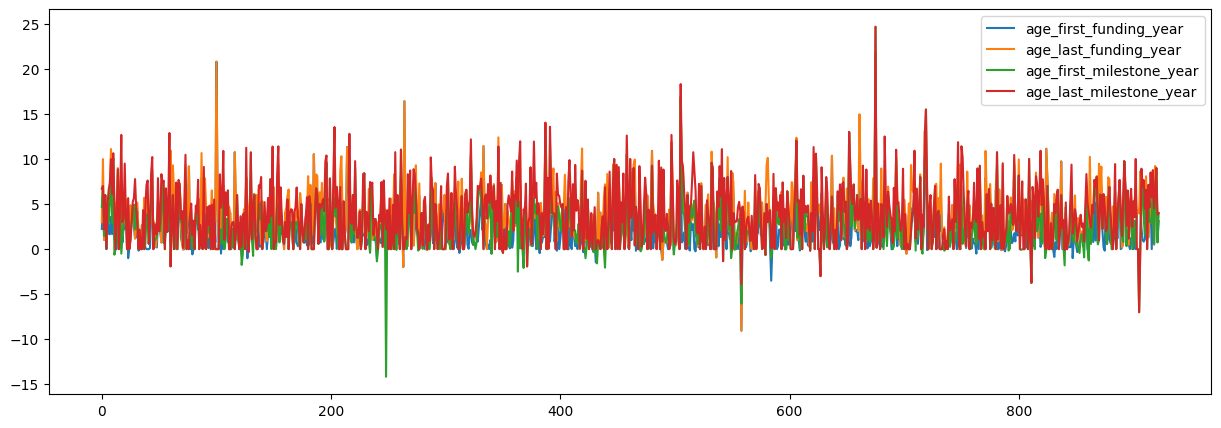

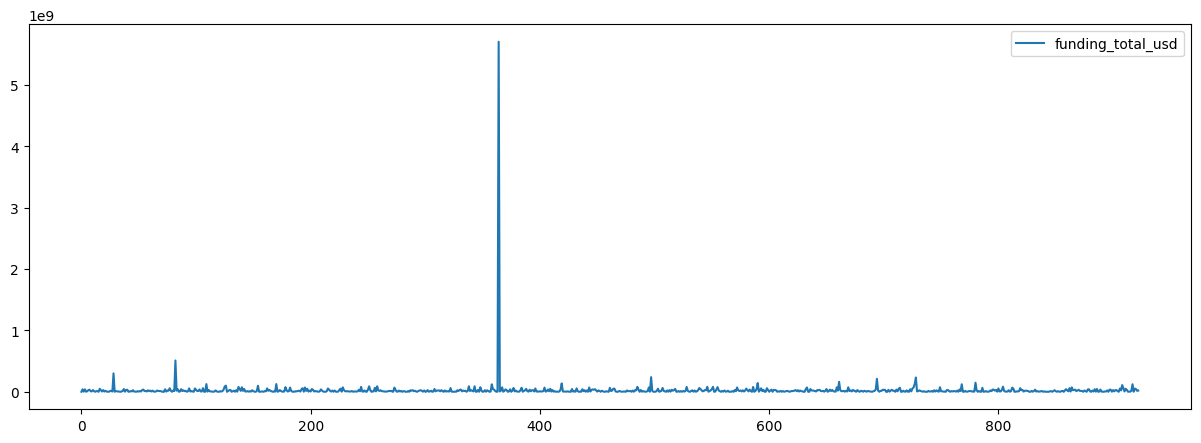

In [ ]:
df[['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year']].plot(figsize=(15, 5))
df[['funding_total_usd']].plot(figsize=(15, 5))

In [ ]:
[df[(df['age_first_funding_year'] < 0 )   | (df['age_last_funding_year'] < 0) |
    (df['age_first_milestone_year'] < 0 ) | (df['age_last_milestone_year'] < 0)].shape]

[(83, 47)]

In [ ]:
df.drop(df[(df['age_first_funding_year'] < 0 )   | (df['age_last_funding_year'] < 0) |
           (df['age_first_milestone_year'] < 0 ) | (df['age_last_milestone_year'] < 0 )].index,
        axis=0, inplace=True)

In [ ]:
Q1 = df['funding_total_usd'].quantile(0.25)
Q3 = df['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

funding_total_outliers = df[(df['funding_total_usd'] < lower_bound) | (df['funding_total_usd'] > upper_bound)]
print(funding_total_outliers.shape[0])
df.drop(funding_total_outliers.index,inplace=True)

61


In [ ]:
describeNum = df.drop(['latitude','longitude'],axis=1)
describeNum['funding_total_usd'] = describeNum['funding_total_usd']/1_000_000
describeNum = describeNum.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='rocket',low=0.2,high=2.9)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,779.000000,577.057766,335.460192,2.000000,280.500000,592.000000,876.500000,1153.000000
age_first_funding_year,779.000000,2.427748,2.537635,0.000000,0.676700,1.597300,3.784900,21.895900
age_last_funding_year,779.000000,3.955836,2.902893,0.000000,1.810950,3.476700,5.547950,21.895900
age_first_milestone_year,779.000000,2.712284,2.822511,0.000000,0.300000,2.005500,4.002700,24.684900
age_last_milestone_year,779.000000,3.989337,3.353382,0.000000,1.000000,3.756200,6.005500,24.684900
relationships,779.000000,7.291399,6.684869,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,779.000000,2.168164,1.260927,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,779.000000,13.914112,13.937563,0.011000,3.000000,9.950000,21.485000,59.000000
milestones,779.000000,1.795892,1.316568,0.000000,1.000000,2.000000,3.000000,8.000000
is_CA,779.000000,0.521181,0.499872,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
describeNum = df.describe(include=["O"])
describeNum.T

,count,unique,top,freq
state_code,779,35,CA,407
zip_code,779,340,94107,26
id,779,778,c:28482,2
city,779,199,San Francisco,110
Unnamed: 6,779,357,San Francisco CA 94107,26
name,779,778,Redwood Systems,2
category_code,779,34,software,142
object_id,779,778,c:28482,2


In [ ]:
df[df['id'] == 'c:28482'].shape

(2, 47)

In [ ]:
df.drop(df[df['id'] == 'c:28482'].index[1], axis=0,inplace=True)

In [ ]:
df.rename(columns={'Unnamed: 0': 'index', 'Unnamed: 6': 'full_address', 'status': 'is_acquired'}, inplace=True)

In [ ]:
df_categorical = df.select_dtypes(include=['object'])
df_numerical = df.drop(df_categorical.columns, axis=1)
df.head(3)

,index,state_code,latitude,longitude,zip_code,id,city,full_address,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,2007-01-01,2014-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,2000-01-01,2014-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,2014-01-01,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.00,1,1


In [ ]:
df['has_RoundABCD'] = np.where((df['has_roundA'] == 1) | (df['has_roundB'] == 1) |
                               (df['has_roundC'] == 1) | (df['has_roundD'] == 1), 1, 0)
df['has_Investor'] = np.where((df['has_VC'] == 1) | (df['has_angel'] == 1), 1, 0)

In [ ]:
df['has_Seed'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 1), 1, 0)
df['invalid_startup'] = np.where((df['has_RoundABCD'] == 0) & (df['has_Investor'] == 0), 1, 0)

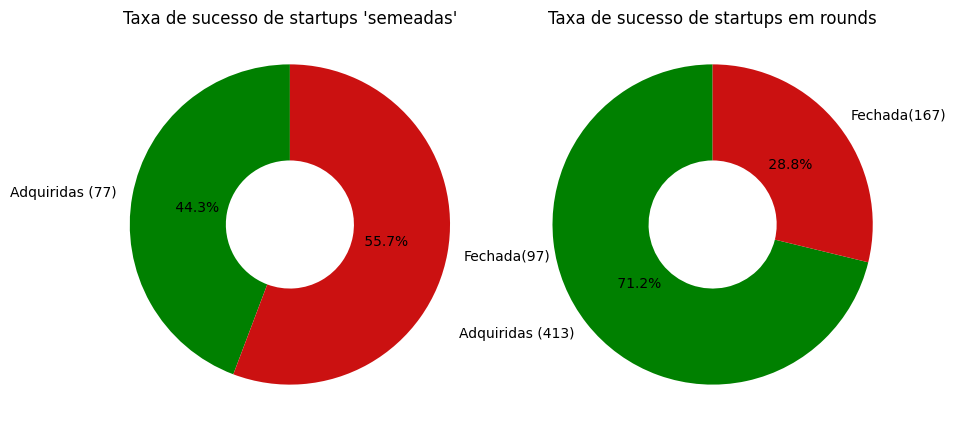

In [ ]:
seeded_success = df[(df['is_acquired'] == 1) & (df['has_Seed'] == 1)].shape[0]
seeded_failure = df[(df['is_acquired'] == 0) & (df['has_Seed'] == 1)].shape[0]
seeded_labels = ['Adquiridas (' + str(seeded_success) + ')', 'Fechada(' + str(seeded_failure) + ')']
sides_seeded = [seeded_success, seeded_failure]
colors = ['green', '#CB1111']

round_success = df[(df['is_acquired'] == 1) & (df['has_RoundABCD'] == 1)].shape[0]
round_failure = df[(df['is_acquired'] == 0) & (df['has_RoundABCD'] == 1)].shape[0]
round_labels = ['Adquiridas (' + str(round_success) + ')', 'Fechada(' + str(round_failure) + ')']
sizes_round = [round_success, round_failure]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(sides_seeded, labels=seeded_labels, colors=colors, autopct='%5.1f%%', startangle=90, wedgeprops=dict(width=0.6))
axs[0].axis('equal')
axs[0].set_title('Taxa de sucesso de startups \'semeadas\'')

axs[1].pie(sizes_round, labels=round_labels, colors=colors, autopct='%5.1f%%', startangle=90, wedgeprops=dict(width=0.6))
axs[1].axis('equal')
axs[1].set_title('Taxa de sucesso de startups em rounds')

plt.show()


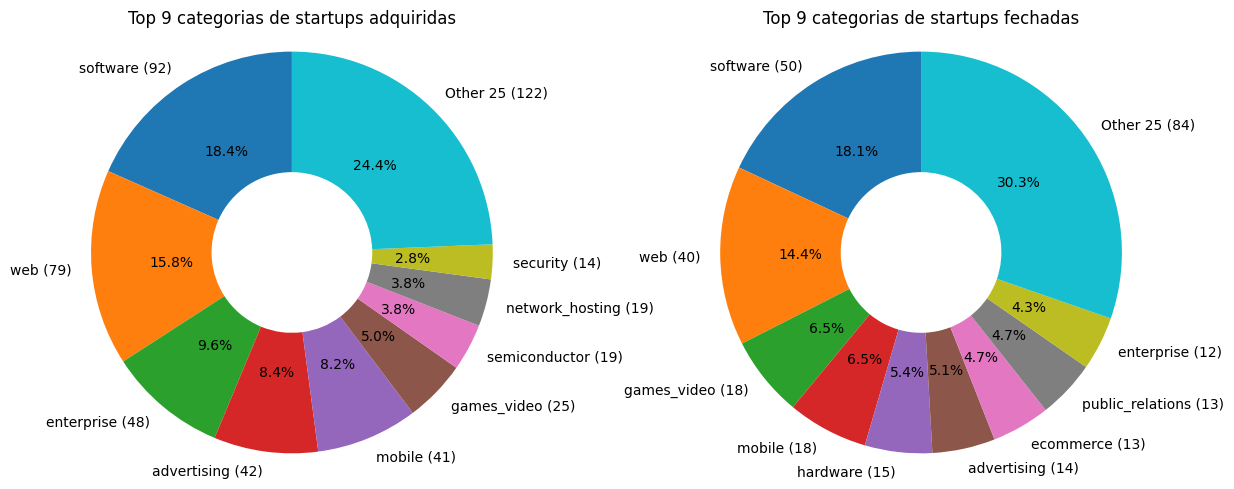

In [ ]:
acquired_df = df[df['is_acquired'] == 1]
closed_df = df[df['is_acquired'] == 0]

acquired_category_counts = acquired_df['category_code'].value_counts()
closed_category_counts = closed_df['category_code'].value_counts()

top_9_acquired = acquired_category_counts.head(9)
top_9_closed = closed_category_counts.head(9)

top_9_acquired['Other 25']  = acquired_category_counts.iloc[9:].sum()
top_9_closed['Other 25']  = closed_category_counts.iloc[9:].sum()

acquired_labels = [f'{label} ({count})' for label, count in zip(top_9_acquired.index, top_9_acquired.values)]
closed_labels = [f'{label} ({count})' for label, count in zip(top_9_closed.index, top_9_closed.values)]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].pie(top_9_acquired, labels=acquired_labels, autopct='%1.1f%%', startangle=90,
            wedgeprops=dict(width=0.6), textprops={'fontsize': 10})
axs[0].axis('equal')
axs[0].set_title('Top 9 categorias de startups adquiridas')

axs[1].pie(top_9_closed, labels=closed_labels, autopct='%1.1f%%', startangle=90,
            wedgeprops=dict(width=0.6), textprops={'fontsize': 10})
axs[1].axis('equal')
axs[1].set_title('Top 9 categorias de startups fechadas')

plt.tight_layout()
plt.show()


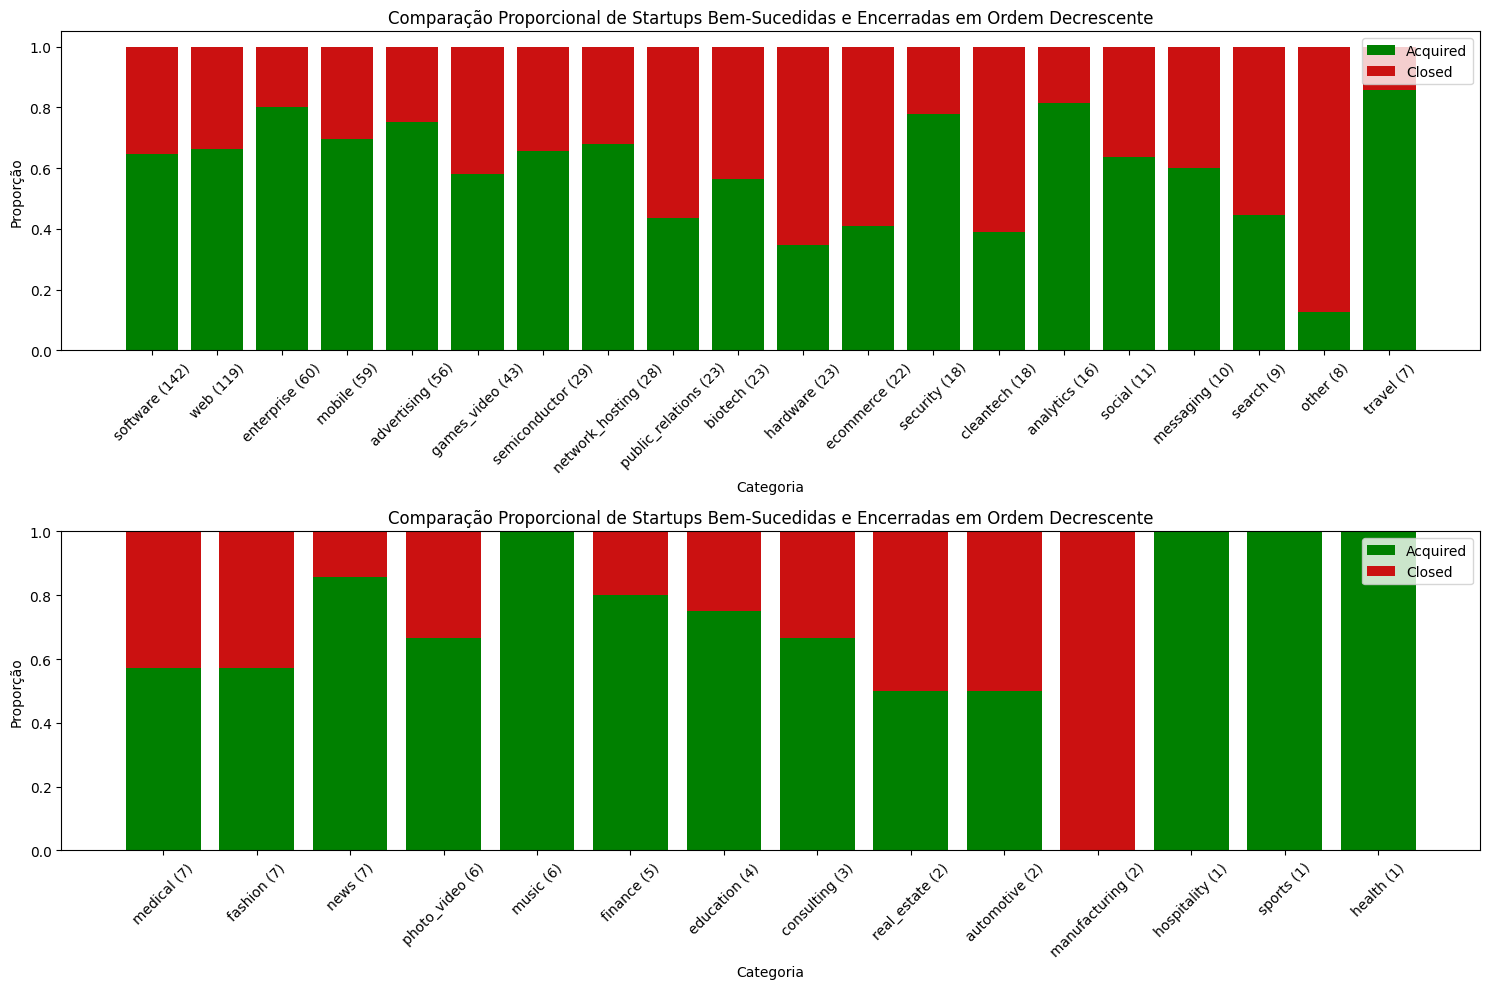

In [ ]:
category_counts['Acquired'] = df[df['is_acquired'] == 1].groupby('category_code')['is_acquired'].count()
category_counts['Closed'] = df[df['is_acquired'] == 0].groupby('category_code')['is_acquired'].count()

category_counts.fillna(0, inplace=True)

category_counts['Total'] = category_counts['Acquired'] + category_counts['Closed']

category_counts['Acquired_prop'] = category_counts['Acquired'] / category_counts['Total']
category_counts['Closed_prop'] = category_counts['Closed'] / category_counts['Total']

category_counts = category_counts.sort_values(by='Total', ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(15, 10))

labels_top20 = [f'{label} ({int(count)})' for label, count in zip(category_counts.index[:20], category_counts['Total'][:20])]
axs[0].bar(labels_top20, category_counts['Acquired_prop'][:20], color='green', label='Acquired')
axs[0].bar(labels_top20, category_counts['Closed_prop'][:20], bottom=category_counts['Acquired_prop'][:20], color='#CB1111', label='Closed')
axs[0].set_title('Comparação Proporcional de Startups Bem-Sucedidas e Encerradas em Ordem Decrescente')
axs[0].set_xlabel('Categoria')
axs[0].set_ylabel('Proporção')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend()

labels_rest = [f'{label} ({int(count)})' for label, count in zip(category_counts.index[20:], category_counts['Total'][20:])]
axs[1].bar(labels_rest, category_counts['Acquired_prop'][20:], color='green', label='Acquired')
axs[1].bar(labels_rest, category_counts['Closed_prop'][20:], bottom=category_counts['Acquired_prop'][20:], color='#CB1111', label='Closed')
axs[1].set_title('Comparação Proporcional de Startups Bem-Sucedidas e Encerradas em Ordem Decrescente')
axs[1].set_xlabel('Categoria')
axs[1].set_ylabel('Proporção')
axs[1].tick_params(axis='x', rotation=45)
axs[1].legend()

plt.tight_layout()
plt.show()


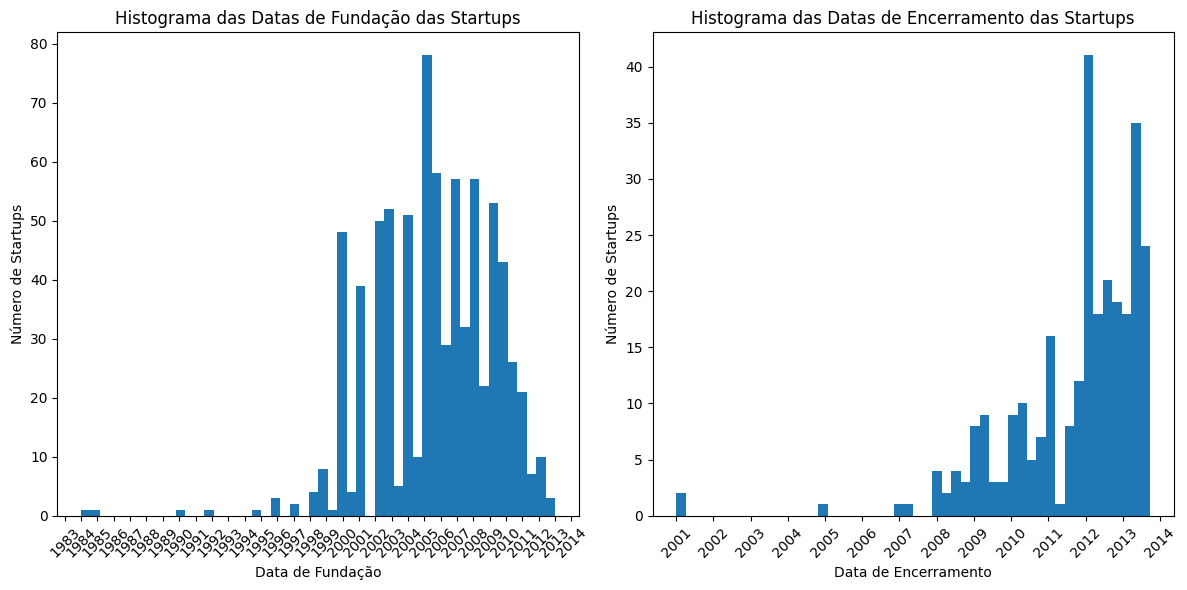

In [119]:
plt.figure(figsize=(12, 6))

# Histograma para aberturas de startup
plt.subplot(1, 2, 1)
plt.hist(df['founded_at'], bins=50)
plt.title('Histograma das Datas de Fundação das Startups')
plt.xlabel('Data de Fundação')
plt.ylabel('Número de Startups')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Histograma para fechamentos de startup
plt.subplot(1, 2, 2)
plt.hist(df['closed_at'].drop(df[df['closed_at'] == '01/01/2014'].index), bins=50)
plt.title('Histograma das Datas de Encerramento das Startups')
plt.xlabel('Data de Encerramento')
plt.ylabel('Número de Startups')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()